In [239]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

### Load the csv files.

In [240]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [241]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [242]:
# Read the ride data file and store in DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspect the DataFrames

In [243]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [244]:
# Get the columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [245]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [246]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [247]:
sum(city_data_df['type']=="Urban")

66

In [248]:
sum(city_data_df['type']=="Suburban")

36

In [249]:
sum(city_data_df['type']=="Rural")

18

In [250]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [251]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [252]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the DataFrames

In [253]:
# Combine the data into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display new DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# 5.3.1

## Create DataFrames for each city type

In [254]:
# Create the Urban DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [255]:
# Create DataFrames for Suburban and Rural cities.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Create (3) Series
### 1 - Get total rides for city types

In [256]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [257]:
# Get the number of rides for suburban and rural cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

### 2 - Get average fare for city types

In [258]:
# Get average fare each city in Urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [259]:
# Get average fare each city in Suburban and Rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

### 3 - Get the average number of drivers for each city in the city types

In [260]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [261]:
# Get the average number of drivers for each suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

## Create Bubble Chart for Urban Cities

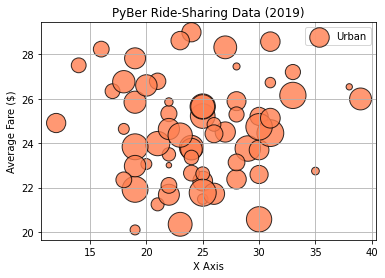

In [262]:
# Build the scatter plots for urban cities.
#plt.scatter(urban_ride_count, urban_avg_fare)
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s= (urban_driver_count * 10),
            edgecolor="black",
            c="coral",
            alpha=0.8,
            linewidths=1,
            label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("X Axis")
plt.grid(True)
# Add the legend.
plt.legend()


## Create Bubble Chart for Suburban Cities

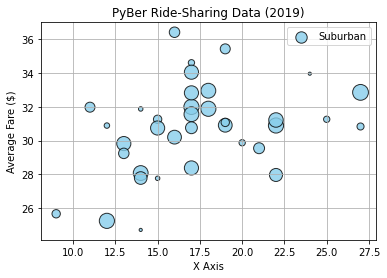

In [263]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s= (suburban_driver_count * 10),
            edgecolor="black",
            c="skyblue",
            alpha=0.8,
            linewidths=1,
            label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("X Axis")
plt.grid(True)
# Add the legend.
plt.legend()

## Create Bubble Chart for Suburban Cities

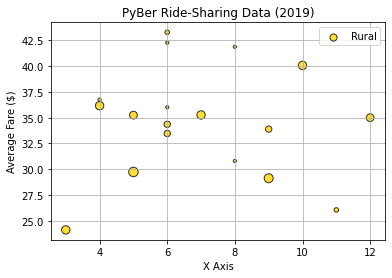

In [264]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s= (rural_driver_count * 10),
            edgecolor="black",
            c="gold",
            alpha=0.8,
            linewidths=1,
            label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("X Axis")
plt.grid(True)
# Add the legend.
plt.legend()

# 5.3.6 Bubble Chart for All Cities

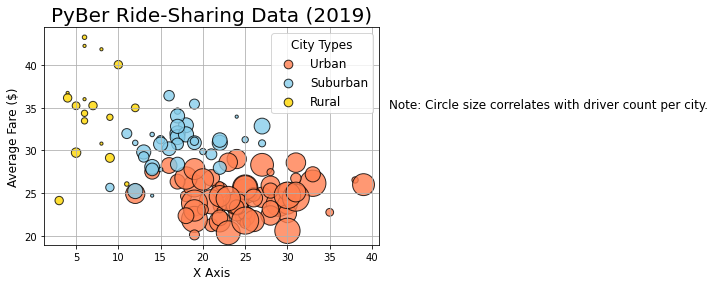

<Figure size 432x288 with 0 Axes>

In [265]:
### Combine all three bubble charts (code) into one cell.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s= (urban_driver_count * 10),
            edgecolor="black",
            c="coral",
            alpha=0.8,
            linewidths=1,
            label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s= (suburban_driver_count * 10),
            edgecolor="black",
            c="skyblue",
            alpha=0.8,
            linewidths=1,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s= (rural_driver_count * 10),
            edgecolor="black",
            c="gold",
            alpha=0.8,
            linewidths=1,
            label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("X Axis", fontsize=12)
plt.grid(True)
# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, 
                 loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
plt.show()
plt.savefig("analysis/Fig1.png")

# 5.4.1

## Using Statistics with Data

### Stats from city type DataFrames

In [266]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [267]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [268]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### Stats from ride count Series.

In [269]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [270]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [271]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas mean( ), median( ), and mode( )

In [272]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [273]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [274]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [275]:
suburban_ride_count.mode()

0    17
dtype: int64

### NumPy mean( ), median( ), mode( ) and SciPy mode( )
#### These can be used when you're using Python interpreter or VS Code environment instead of Jupyter notebook

In [276]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [277]:
# Calculate the measures of central tendendcy for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride count for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride count for urban trips is {mode_urban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for suburban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride count for urban trips is 24.00.
The mode for the ride count for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mode for the ride count for suburban trips is ModeResult(mode=array([17]), count=array([7])).
The mode for the ride count for rural trips is ModeResult(mode=array([6]), count=array([5])).


# 5.4.2

### Summary stats for fares

In [278]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [279]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}")

suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


# 5.4.3

### Summary stats for number of drivers per city type

In [280]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

## SKILL DRILL
### Mean, median, mode for all city type driver counts.

In [281]:
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [300]:
# Calculate the measures of central tendency for the average driver counts for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban cities is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers for urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers for urban cities is {mode_urban_drivers}")

# Calculate the measures of central tendency for the average driver counts for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers for suburban cities is {mean_suburban_drivers}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers for suburban cities is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers for suburban cities is {mode_suburban_drivers}")

# Calculate the measures of central tendency for the average driver counts for the urban cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers for rural cities is {mean_rural_drivers}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers for rural cities is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers for rural cities is {mode_rural_drivers}")

The mean drivers for urban cities is 36.67815384615385.
The median drivers for urban cities is 37.0.
The mode drivers for urban cities is ModeResult(mode=array([39]), count=array([86]))
The mean drivers for suburban cities is 13.712.
The median drivers for suburban cities is 16.0.
The mode drivers for suburban cities is ModeResult(mode=array([20]), count=array([79]))
The mean drivers for rural cities is 4.296.
The median drivers for rural cities is 4.0.
The mode drivers for rural cities is ModeResult(mode=array([1]), count=array([32]))


# 5.4.4 Box and Whisker Plots

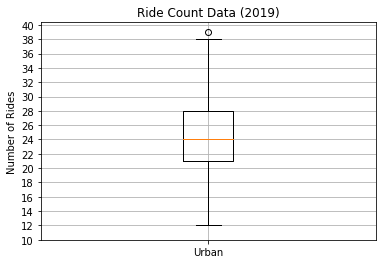

In [283]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add the title, y_axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2))
ax.grid()
plt.show()

In [284]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## SKILL DRILL:  Do box & whisker for Suburban & Rural

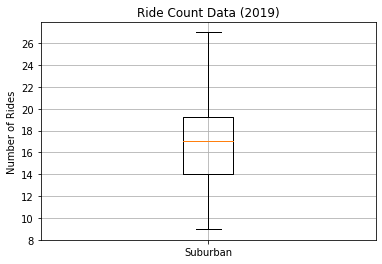

In [285]:
# Create a box-and-whisker plot for the suburban cities ride count.

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# Add the title, y_axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8, 28, step=2))
ax.grid()
plt.show()

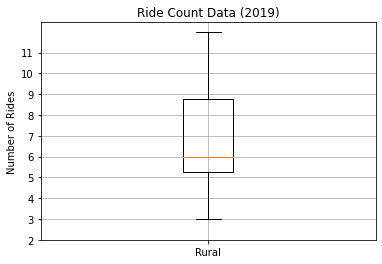

In [286]:
# Create a box-and-whisker plot for the rural cities ride count.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# Add the title, y_axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2, 12))
ax.grid()
plt.show()

### Add all three to one box-and-whisker chart

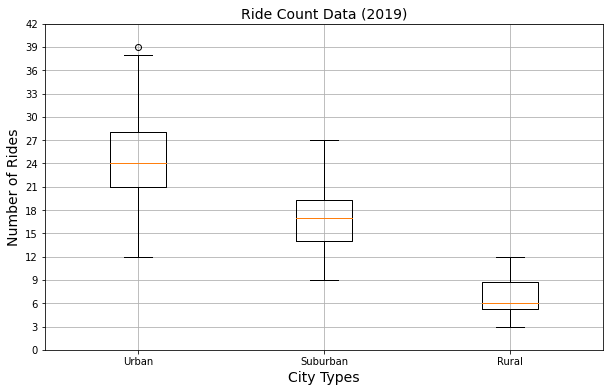

In [318]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]

# I could set the ride counts to an array variable
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=14)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

### Get outlier from Urban rides

In [319]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-whisker for ride fare data.

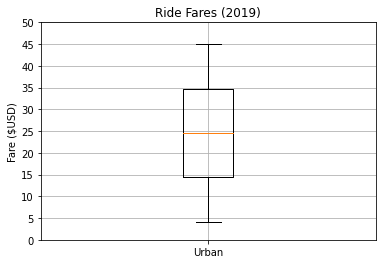

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [320]:
# Create a box-and-whisker plot for urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Fares (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

## SKILL DRILL

### Create box-and-whisker plots for the suburban_fares and the rural_fares with summary statistics.

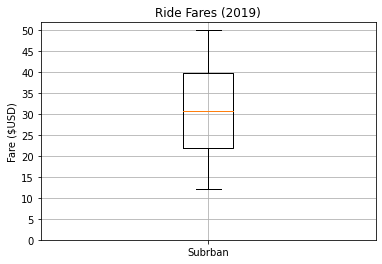

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [321]:
# Create a box-and-whisker plot for suburban fare data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Fares (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

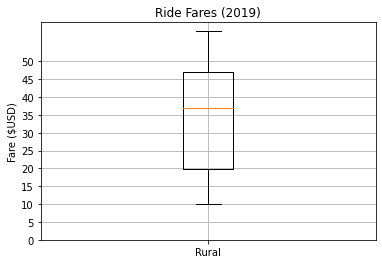

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [322]:
# Create a box-and-whisker plot for rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Fares (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

## SKILL DRILL

### Create a box-and-whisker plot that has all three city types' fare data in one plot that looks similar to the following image. Save the combined box-and-whisker plot as Fig3.png to your "analysis" folder.

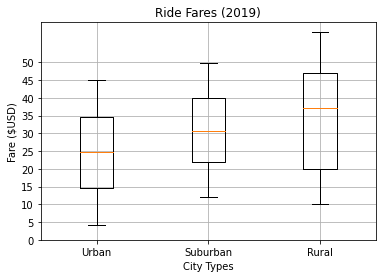

<Figure size 432x288 with 0 Axes>

In [323]:
# Create a box-and-whisker plot for all city type fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fares (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.set_xlabel("City Types")

ax.grid()
plt.show()

# Save Image
plt.savefig("analysis/Fig3.png")

## Box-and-whisker plot for Driver Count Data

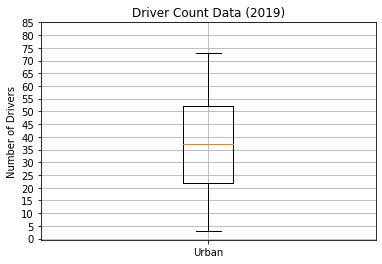

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [324]:
# Create the box-and-whisker plot for urban driver count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

## SKILL DRILL

### Using the code for the box-and-whisker plots for the urban drivers, create box-and-whisker plots for the suburban_drivers and the rural_drivers Series with summary statistics.

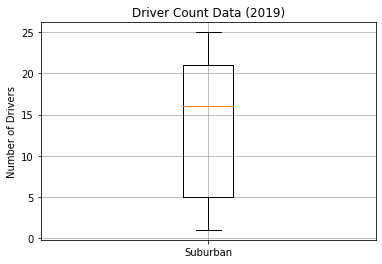

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [325]:
# Create box-and-whisker for suburban driver data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add titles
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=5))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

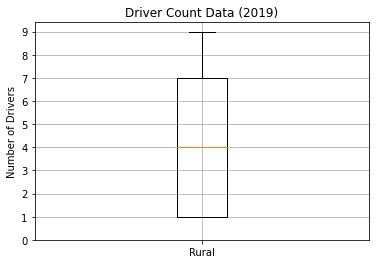

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [326]:
# Create box-and-whisker for rural driver data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add titles and stuff
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 10))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

## SKILL DRILL

### Create a box-and-whisker plot that has all three city types' driver count data in one box-and-whisker plot that looks similar to the following image. Save this combined box-and-whisker plot as Fig4.png in your "analysis" folder.

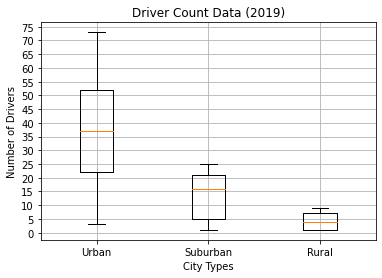

<Figure size 432x288 with 0 Axes>

In [331]:
# Create box-and-whisker for all three driver datasets.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
data_series = [urban_drivers, suburban_drivers, rural_drivers]
ax.boxplot(data_series, labels=x_labels)

# Add titles and stuff
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 80, step=5))
ax.set_xlabel("City Types")
ax.grid()
plt.show()

plt.savefig("analysis/Fig4.png")

# 5.5.1 Pie Charts

In [341]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [342]:
# Get total fares for all cities
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [347]:
# Get % of total fares for each city type
urban_percent_fares = sum_fares_by_type / total_fares * 100
urban_percent_fares

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"]/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

# 5.5.2

## Create pie charts for % fares by city type

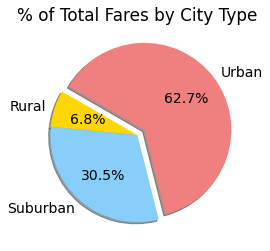

In [361]:
# Build the % of fares by city type pie chart.
import matplotlib as mpl
plt.pie(type_percents, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True,
       startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig5.png")

# Show figure
plt.show()

# 5.6.1

### Ride Percentages

In [362]:
#Get the total number of rides for each city type.
#Get the total rides for all the city types.
#Calculate the percentage of the total rides for each city type.

In [364]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [376]:
# Total rides
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type
print(total_rides_by_type)

total_rides = pyber_data_df['ride_id'].count()
print(total_rides)

ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64
2375


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

# 5.6.2 Create Pie Chart

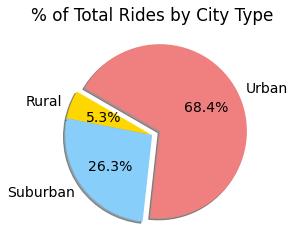

In [377]:
# Build the % of rides by city type pie chart.
plt.pie(ride_percents, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True,
       startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig6.png")

# Show figure
plt.show()

# 5.7.1 & 5.7.2 Pie Chart for Driver Percentages

In [378]:
#Get the total number of drivers for each city type.
#Get the total drivers for all the city types.
#Calculate the percentage of the total drivers for each city type.

In [380]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

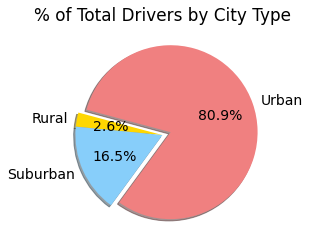

In [381]:
# Build the % of drivers by city type pie chart.
plt.pie(driver_percents, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True,
       startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig7.png")

# Show figure
plt.show()